# คำถาม
1. วิเคราะห์และสำรวจข้อมูลเบื้องต้น 
1. ตั้งประเด็นคำถามที่น่าสนใจพร้อมสร้าง machine learning model เพื่อตอบคำถาม

In [1]:
import math
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pd.Timestamp.now()
# pd.Timestamp.now().strftime('%Y-%m-%d')

Python  version: 3.8.2 (default, Mar 26 2020, 10:43:30) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas  version: 1.3.3
numpy   version: 1.20.3
seaborn version: 0.11.2


Timestamp('2021-10-19 02:20:45.677705')

## 1. วิเคราะห์และสำรวจข้อมูลเบื้องต้น

### WHO latest COVID data (https://covid19.who.int/table)
data (27 June 2021) = https://github.com/GuySuphakit/WHO-COVID-19-Analysis/blob/main/WHO%20COVID-19%20global%20table%20data%20June%2027th%202021%20at%205.02.05%20AM.csv 

In [4]:
from datetime import datetime
import socket # pip install socket

print(f'last run: {datetime.now()}')

try:
    print(f'host info: {socket.gethostbyname_ex(socket.gethostname())}')
except:
    pass

data_url='https://raw.githubusercontent.com/GuySuphakit/WHO-COVID-19-Analysis/main/WHO%20COVID-19%20global%20table%20data%20June%2027th%202021%20at%205.02.05%20AM.csv'
df=pd.read_csv(data_url)
df[:5]

last run: 2021-10-19 02:20:45.688133
host info: ('guy', [], ['192.168.1.16'])


Name       WHO Region  Cases - cumulative total  \
0                    Global              NaN                 179686071   
1  United States of America         Americas                  33257768   
2                     India  South-East Asia                  30134445   
3                    Brazil         Americas                  18169881   
4                    France           Europe                   5655376   

   Cases - cumulative total per 100000 population  \
0                                     2305.281168   
1                                    10047.580000   
2                                     2183.650000   
3                                     8548.140000   
4                                     8695.310000   

   Cases - newly reported in last 7 days  \
0                                2565745   
1                                  82369   
2                                 371652   
3                                 541293   
4                                  11620   

   Cases - newly reported in last 7 days per 100000 population  \
0                                          32.917207             
1                                          24.880000             
2                                          26.930000             
3                                         254.650000             
4                                          17.870000             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                   437764                    3899172   
1                                    14239                     597727   
2                                    51667                     393310   
3                                   115228                     507109   
4                                     1796                     110001   

   Deaths - cumulative total per 100000 population  \
0                                        50.024399   
1                                       180.580000   
2                                        28.500000   
3                                       238.570000   
4                                       169.130000   

   Deaths - newly reported in last 7 days  \
0                                   57897   
1                                    2136   
2                                    9820   
3                                   13416   
4                                     258   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                           0.742789              
1                                           0.650000              
2                                           0.710000              
3                                           6.310000              
4                                           0.400000              

   Deaths - newly reported in last 24 hours Transmission Classification  
0                                      9218                         NaN  
1                                       355      Community transmission  
2                                      1329           Clusters of cases  
3                                      2392      Community transmission  
4                                        44      Community transmission

## Exploratory Data Analysis (EDA)

In [5]:
def df_unique_value(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            print(f'{c:10}\n{df[c].unique()}')
            print('-' * 65)
            
def convert_cols_to_category(df, cols:list):
    """
    convert `cols` to `category`
    """
    for c in df[cols]:
        df[c] = df[c].astype('category')
    return df
    
def convert_obj_columns_to_category(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type.name == 'category':
    #         print(f'{c}: {df[c].cat.categories}')
    #         print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)
            
def plot_mn(df, cols, n_rows:int=1, kind:str='boxplot', color='salmon'):
    """
    plot boxplot, violin, hist in m (rows) by n (columns)
    >>> plot_mn(df, ['Calories', 'Fat'], 2, 'hist')
    """
    n=len(cols)
    n_cols=math.ceil(n / n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.5))
    ax=ax.ravel()

    fig.tight_layout()
    for i, c in enumerate(cols):
        col_type = df[c].dtype
        if col_type.name == 'category':
            sns.countplot(data=df, x=c, ax=ax[i])
        else:
            if kind.lower()=='boxplot':
                sns.boxplot(data=df[[c]], ax=ax[i], color=color)   
            if kind.lower()=='boxen':
                sns.boxenplot(data=df[[c]], ax=ax[i], color=color)   
            elif kind.lower()=='violin':
                sns.violinplot(data=df[[c]], ax=ax[i], color=color)   
            elif kind.lower()=='hist':
                sns.distplot(df[c], hist=True, kde=False, ax=ax[i], color=color)

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

In [7]:
df.head()

Name       WHO Region  Cases - cumulative total  \
0                    Global              NaN                 179686071   
1  United States of America         Americas                  33257768   
2                     India  South-East Asia                  30134445   
3                    Brazil         Americas                  18169881   
4                    France           Europe                   5655376   

   Cases - cumulative total per 100000 population  \
0                                     2305.281168   
1                                    10047.580000   
2                                     2183.650000   
3                                     8548.140000   
4                                     8695.310000   

   Cases - newly reported in last 7 days  \
0                                2565745   
1                                  82369   
2                                 371652   
3                                 541293   
4                                  11620   

   Cases - newly reported in last 7 days per 100000 population  \
0                                          32.917207             
1                                          24.880000             
2                                          26.930000             
3                                         254.650000             
4                                          17.870000             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                   437764                    3899172   
1                                    14239                     597727   
2                                    51667                     393310   
3                                   115228                     507109   
4                                     1796                     110001   

   Deaths - cumulative total per 100000 population  \
0                                        50.024399   
1                                       180.580000   
2                                        28.500000   
3                                       238.570000   
4                                       169.130000   

   Deaths - newly reported in last 7 days  \
0                                   57897   
1                                    2136   
2                                    9820   
3                                   13416   
4                                     258   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                           0.742789              
1                                           0.650000              
2                                           0.710000              
3                                           6.310000              
4                                           0.400000              

   Deaths - newly reported in last 24 hours Transmission Classification  
0                                      9218                         NaN  
1                                       355      Community transmission  
2                                      1329           Clusters of cases  
3                                      2392      Community transmission  
4                                        44      Community transmission

In [8]:
df.isna().sum()

Name                                                            0
WHO Region                                                      1
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  1
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     1
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 1
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    1
Deaths - newly reported in last 24 hours                        0
Transmission Classification                                     1
dtype: int64

In [9]:
# ตามหาข้อมูลที่เป็น unique value ของแต่ละคอลัมน์
df_unique_value(df)

Name      
['Global' 'United States of America' 'India' 'Brazil' 'France'
 'Russian Federation' 'Turkey' 'The United Kingdom' 'Argentina' 'Italy'
 'Colombia' 'Spain' 'Germany' 'Iran (Islamic Republic of)' 'Poland'
 'Mexico' 'Ukraine' 'Indonesia' 'Peru' 'South Africa' 'Netherlands'
 'Czechia' 'Chile' 'Canada' 'Philippines' 'Iraq' 'Sweden' 'Belgium'
 'Romania' 'Pakistan' 'Bangladesh' 'Portugal' 'Israel' 'Hungary' 'Japan'
 'Jordan' 'Malaysia' 'Serbia' 'Switzerland' 'Austria' 'Nepal'
 'United Arab Emirates' 'Lebanon' 'Morocco' 'Saudi Arabia' 'Kazakhstan'
 'Ecuador' 'Bolivia (Plurinational State of)' 'Bulgaria' 'Greece'
 'Belarus' 'Paraguay' 'Panama' 'Tunisia' 'Slovakia' 'Georgia' 'Uruguay'
 'Croatia' 'Costa Rica' 'Kuwait'
 'occupied Palestinian territory, including east Jerusalem' 'Azerbaijan'
 'Dominican Republic' 'Denmark' 'Guatemala' 'Egypt' 'Lithuania' 'Ethiopia'
 'Ireland' 'Venezuela (Bolivarian Republic of)' 'Bahrain' 'Slovenia'
 'Oman' 'Republic of Moldova' 'Honduras' 'Sri Lanka' 'T

In [10]:
df[df['Cases - cumulative total per 100000 population'].isna()|df['WHO Region'].isna()]

Name WHO Region  Cases - cumulative total  \
0    Global        NaN                 179686071   
201   Other      Other                       764   

     Cases - cumulative total per 100000 population  \
0                                       2305.281168   
201                                             NaN   

     Cases - newly reported in last 7 days  \
0                                  2565745   
201                                      0   

     Cases - newly reported in last 7 days per 100000 population  \
0                                            32.917207             
201                                                NaN             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                     437764                    3899172   
201                                        0                         13   

     Deaths - cumulative total per 100000 population  \
0                                          50.024399   
201                                              NaN   

     Deaths - newly reported in last 7 days  \
0                                     57897   
201                                       0   

     Deaths - newly reported in last 7 days per 100000 population  \
0                                             0.742789              
201                                                NaN              

     Deaths - newly reported in last 24 hours Transmission Classification  
0                                        9218                         NaN  
201                                         0              Not applicable

In [11]:
df[df['Transmission Classification'] == 'No cases'].head()

Name WHO Region  Cases - cumulative total  \
196  Isle of Man     Europe                      1603   
210      Grenada   Americas                       161   
212     Anguilla   Americas                       109   
214    Greenland     Europe                        50   
217   Montserrat   Americas                        20   

     Cases - cumulative total per 100000 population  \
196                                         1885.17   
210                                          143.08   
212                                          726.57   
214                                           88.07   
217                                          400.08   

     Cases - newly reported in last 7 days  \
196                                      4   
210                                      0   
212                                      0   
214                                      1   
217                                      0   

     Cases - newly reported in last 7 days per 100000 population  \
196                                               4.70             
210                                               0.00             
212                                               0.00             
214                                               1.76             
217                                               0.00             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
196                                        0                         29   
210                                        0                          1   
212                                        0                          0   
214                                        0                          0   
217                                        0                          1   

     Deaths - cumulative total per 100000 population  \
196                                            34.10   
210                                             0.89   
212                                             0.00   
214                                             0.00   
217                                            20.00   

     Deaths - newly reported in last 7 days  \
196                                       0   
210                                       0   
212                                       0   
214                                       0   
217                                       0   

     Deaths - newly reported in last 7 days per 100000 population  \
196                                                0.0              
210                                                0.0              
212                                                0.0              
214                                                0.0              
217                                                0.0              

     Deaths - newly reported in last 24 hours Transmission Classification  
196                                         0                    No cases  
210                                         0                    No cases  
212                                         0                    No cases  
214                                         0                    No cases  
217                                         0                    No cases

In [12]:
df[df['Transmission Classification'] == 'Not applicable'].head() #ไม่สามารถนำไปปรับใช้ได้

Name WHO Region  Cases - cumulative total  \
201  Other      Other                       764   

     Cases - cumulative total per 100000 population  \
201                                             NaN   

     Cases - newly reported in last 7 days  \
201                                      0   

     Cases - newly reported in last 7 days per 100000 population  \
201                                                NaN             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
201                                        0                         13   

     Deaths - cumulative total per 100000 population  \
201                                              NaN   

     Deaths - newly reported in last 7 days  \
201                                       0   

     Deaths - newly reported in last 7 days per 100000 population  \
201                                                NaN              

     Deaths - newly reported in last 24 hours Transmission Classification  
201                                         0              Not applicable

### จากการสำรวจข้อมูลเบื้องต้นพบว่า 
- มีข้อมูลทั้งหมด 236 ประเทศ และเป็น Global กับ other ที่ไม่ใช่ประเทศ
- WHO region เป็นภูมิภาคที่  World Health Organization(WHO) แบ่งออกเป็น 6 ส่วน โดยมีวัตถุประสงค์เพื่อการวิเคราะห์
- มี 6 WHO region คือ Americas, South-East Asia, Europe, Eastern Mediterranean, Africa และ Western Pacific
- มี Cases - cumulative total ที่บ่งบอกยอดสะสมผู้ติดเชื้อ
- มี Deaths - cumulative total ที่บ่งบอกยอดสะสมผู้เสียชีวิต
- มี Transmission Classification ที่บ่งบอกลักษณะการแพร่กระจายทั้งหมด 6 รูปแบบ คือ Community transmission, Clusters of cases, Sporadic cases, Pending, No cases และ Not applicable
- ข้อมูลที่ขาดหายไปเป็นข้อมูลของแถว Global และ Other ที่ไม่ได้เก็บข้อมูลบางส่วนไว้ ซึ่งก็ไม่แปลกที่จะไม่มีเพราะเป็นข้อมูลของคอลัมน์ที่มีไม่ได้ เช่น 
  - WHO Region และ Transmission Classification (Global ไม่มีทางมี) 
  - other ข้อมูลที่ขาดหายไปเป็นข้อมูลที่ปนกันหลายประเทศ ดังนั้น บางคอลัมน์ที่อธิบายเฉพาะเจาะจงจึงไม่มีข้อมูล

จากนั้น
- เราจะทำการลบแถวของ Global และ other ออกเพราะเราไม่ต้องการจำนวนทั้งหมดและต้องการแต่ละประเทศแยกของใครของมัน
- และทำการลบ Transmission Classification ที่เป็น No cases ออก เพราะเราต้องการที่จะวิเคราะห์ประเทศที่มีผู้ป่วยที่ติดเชื้อ COVID-19

In [13]:
# เปลี่ยน data type ที่เป็น Object ให้เป็น category เพื่อให้สามารถทำ countplot ได้
df=convert_obj_columns_to_category(df)

In [14]:
df.drop(index=[0,201], axis=0,inplace=True) # ลบแถวของ Global กับ others ออก
df.drop(index=df[df['Transmission Classification'] == 'No cases'].index, axis=0) #ลบ Transmission Classification ที่เป็น No cases ออก

Name       WHO Region  \
1                          United States of America         Americas   
2                                             India  South-East Asia   
3                                            Brazil         Americas   
4                                            France           Europe   
5                                Russian Federation           Europe   
..                                              ...              ...   
209  Northern Mariana Islands (Commonwealth of the)  Western Pacific   
211                                   New Caledonia  Western Pacific   
213                     Falkland Islands (Malvinas)         Americas   
215                                        Holy See           Europe   
216                       Saint Pierre and Miquelon         Americas   

     Cases - cumulative total  Cases - cumulative total per 100000 population  \
1                    33257768                                        10047.58   
2                    30134445                                         2183.65   
3                    18169881                                         8548.14   
4                     5655376                                         8695.31   
5                     5409088                                         3706.52   
..                        ...                                             ...   
209                       183                                          317.95   
211                       129                                           45.18   
213                        60                                         1722.65   
215                        26                                         3213.84   
216                        26                                          448.66   

     Cases - newly reported in last 7 days  \
1                                    82369   
2                                   371652   
3                                   541293   
4                                    11620   
5                                   127779   
..                                     ...   
209                                      0   
211                                      1   
213                                      0   
215                                      0   
216                                      0   

     Cases - newly reported in last 7 days per 100000 population  \
1                                                24.88             
2                                                26.93             
3                                               254.65             
4                                                17.87             
5                                                87.56             
..                                                 ...             
209                                               0.00             
211                                               0.35             
213                                               0.00             
215                                               0.00             
216                                               0.00             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
1                                      14239                     597727   
2                                      51667                     393310   
3                                     115228                     507109   
4                                       1796                     110001   
5                                      20393                     132064   
..                                       ...                        ...   
209                                        0                          2   
211                                        0                          0   
213                                        0                          0   
215                                        0                          0   
216           

In [15]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification'],
      dtype='object')

In [16]:
cols=['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification']

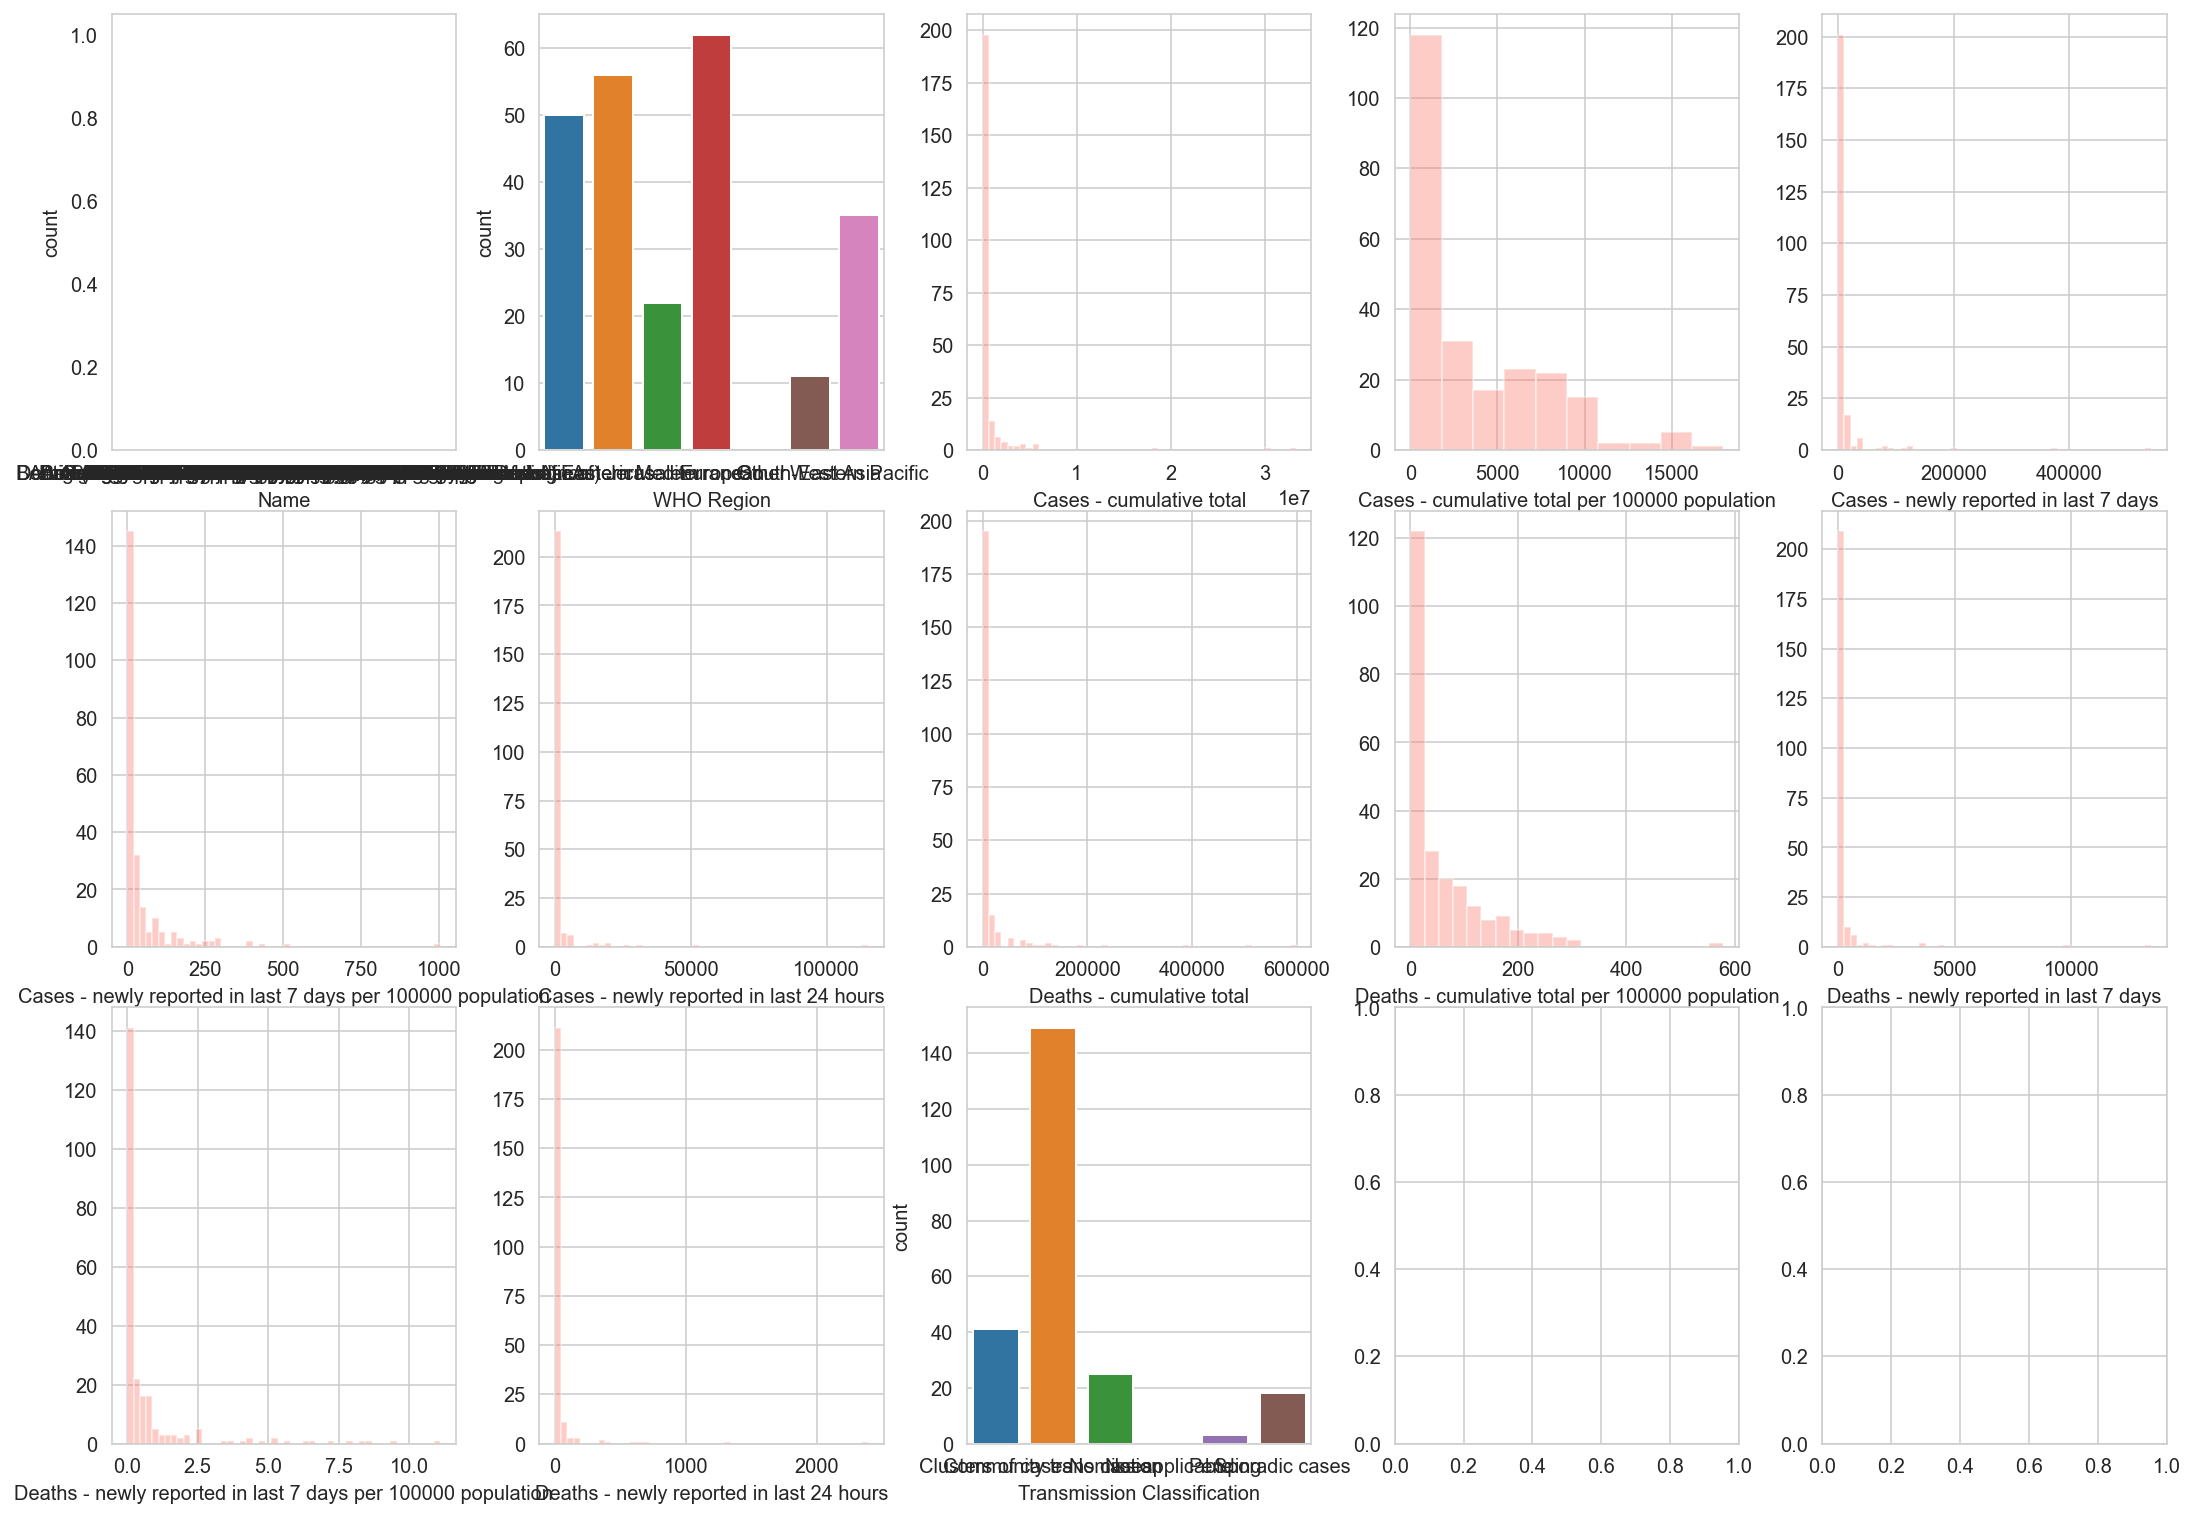

In [17]:
#plot คร่าวๆทุก feature
plot_mn(df, df.columns, 3, 'hist')

### Univariate Analysis (สำรวจทีละ column)

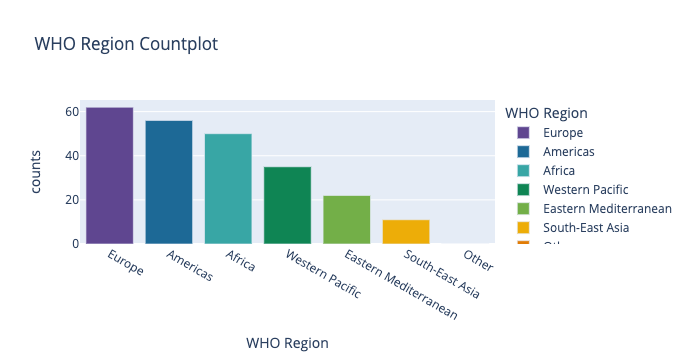

In [18]:
# plt.figure(figsize=(15,8))
# sns.countplot(data=df, x='WHO Region', order= df['WHO Region'].value_counts().index)

temp_df = df.groupby(by="WHO Region", as_index=False).agg(counts=pd.NamedAgg(column="WHO Region", aggfunc="count")).sort_values(by="counts", ascending=False)
px.bar(data_frame=temp_df, 
       x = 'WHO Region',
       y = 'counts',
       color = 'WHO Region',
       color_discrete_sequence = px.colors.qualitative.Prism,
       title = 'WHO Region Countplot')

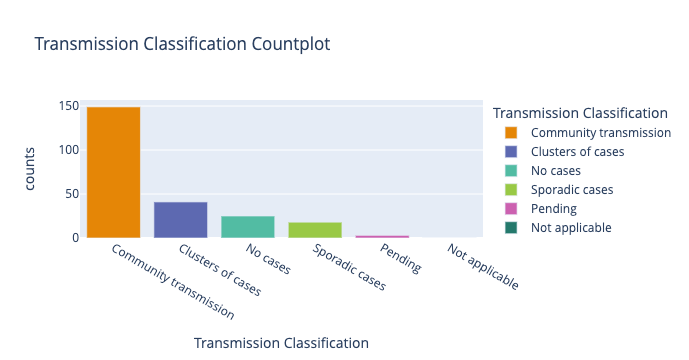

In [19]:
# plt.figure(figsize=(15,8))
# sns.countplot(data=df, x='Transmission Classification',order=df['Transmission Classification'].value_counts().index)

temp_df = df.groupby(by="Transmission Classification", as_index=False).agg(counts=pd.NamedAgg(column="Transmission Classification", aggfunc="count")).sort_values(by="counts", ascending=False)
px.bar(data_frame = temp_df, 
       x = 'Transmission Classification',
       y = 'counts',
       color = 'Transmission Classification',
       color_discrete_sequence = px.colors.qualitative.Vivid,
       title = 'Transmission Classification Countplot')

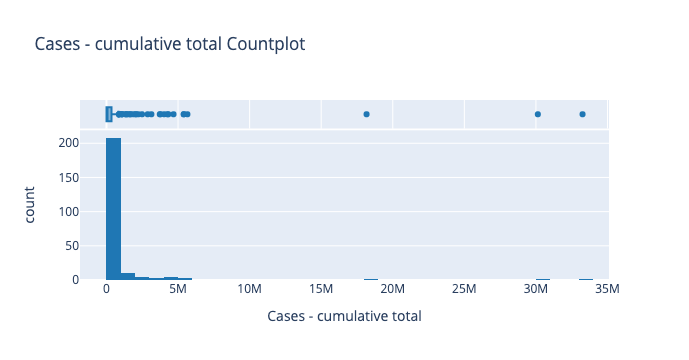

In [20]:
px.histogram(data_frame = df, 
             x = "Cases - cumulative total", 
             marginal = "box",
             color_discrete_sequence = px.colors.qualitative.D3,
             title = 'Cases - cumulative total Countplot')

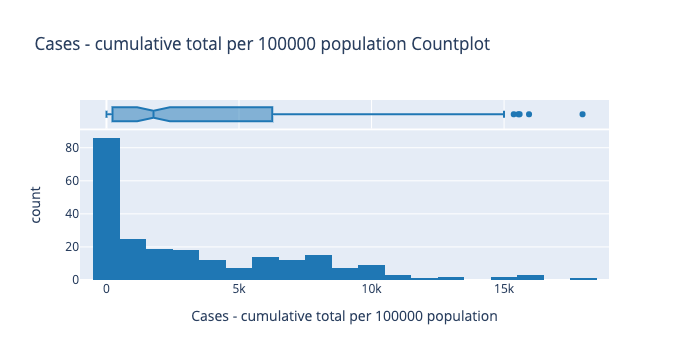

In [21]:
px.histogram(data_frame = df, 
             x = "Cases - cumulative total per 100000 population",
             marginal = "box" ,
             color_discrete_sequence = px.colors.qualitative.D3,
             title = 'Cases - cumulative total per 100000 population Countplot')

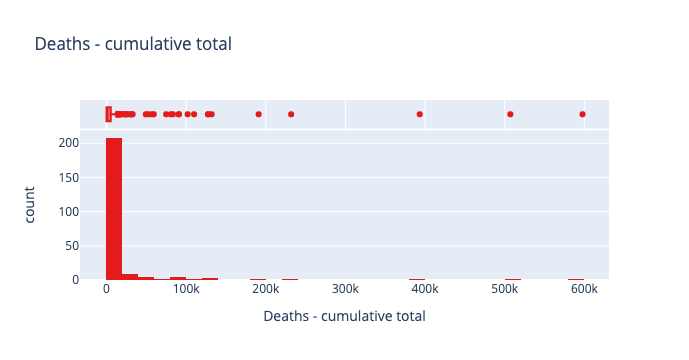

In [22]:
px.histogram(data_frame = df, 
             x = "Deaths - cumulative total",
             marginal = "box",
             color_discrete_sequence = px.colors.qualitative.Set1,
             title = 'Deaths - cumulative total')

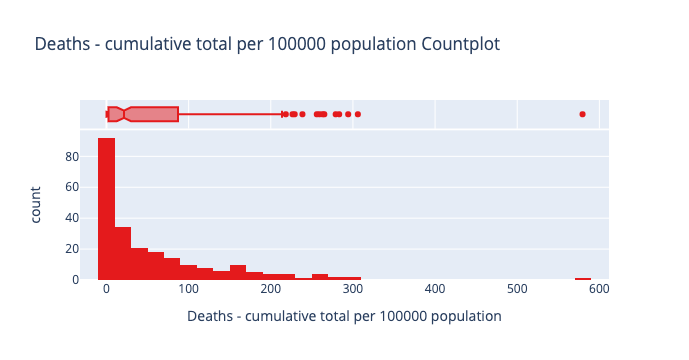

In [23]:
px.histogram(data_frame = df, 
             x = "Deaths - cumulative total per 100000 population",
             marginal = "box",
             color_discrete_sequence = px.colors.qualitative.Set1,
             title = 'Deaths - cumulative total per 100000 population Countplot')

### Bivariate analysis (สำรวจ 2 columns ที่เกี่ยวข้องกัน)

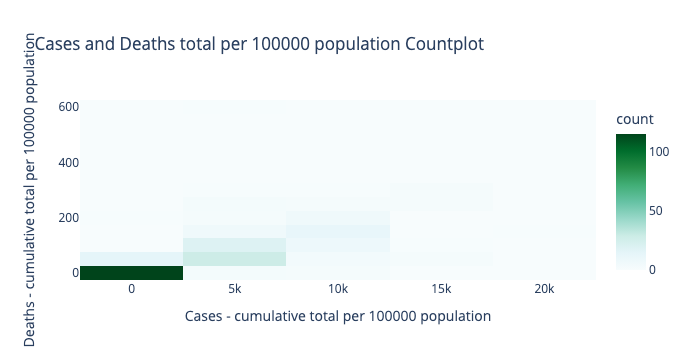

In [24]:
px.density_heatmap(data_frame = df,
               x = "Cases - cumulative total per 100000 population",
               y = "Deaths - cumulative total per 100000 population",
               color_continuous_scale = "BuGn",
               title = 'Cases and Deaths total per 100000 population Countplot')

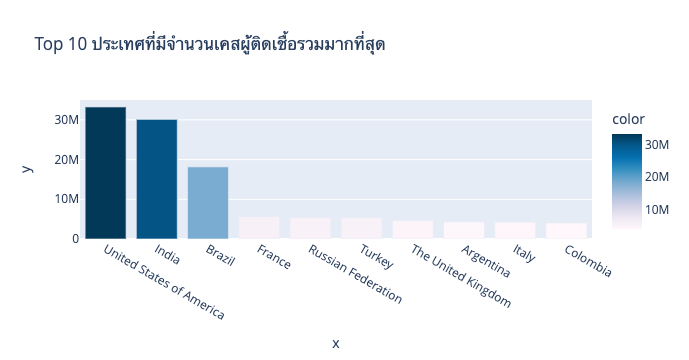

In [25]:
px.bar(data_frame = df, 
       y = df.nlargest(10, 'Cases - cumulative total')['Cases - cumulative total'],
       x = df.nlargest(10, 'Cases - cumulative total')['Name'],
       color = df.nlargest(10, 'Cases - cumulative total')['Cases - cumulative total'],
       color_continuous_scale = "PuBu",
       title = 'Top 10 ประเทศที่มีจำนวนเคสผู้ติดเชื้อรวมมากที่สุด')

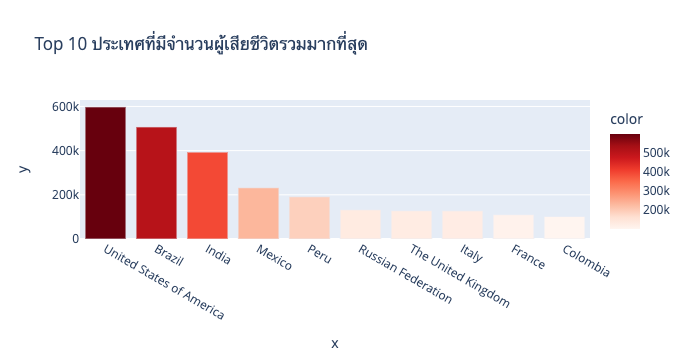

In [26]:
px.bar(data_frame = df, 
       y = df.nlargest(10, 'Deaths - cumulative total')['Deaths - cumulative total'],
       x = df.nlargest(10, 'Deaths - cumulative total')['Name'],
       color = df.nlargest(10, 'Deaths - cumulative total')['Deaths - cumulative total'],
       color_continuous_scale = "Reds",
       title = 'Top 10 ประเทศที่มีจำนวนผู้เสียชีวิตรวมมากที่สุด')

### Correlation Heatmap

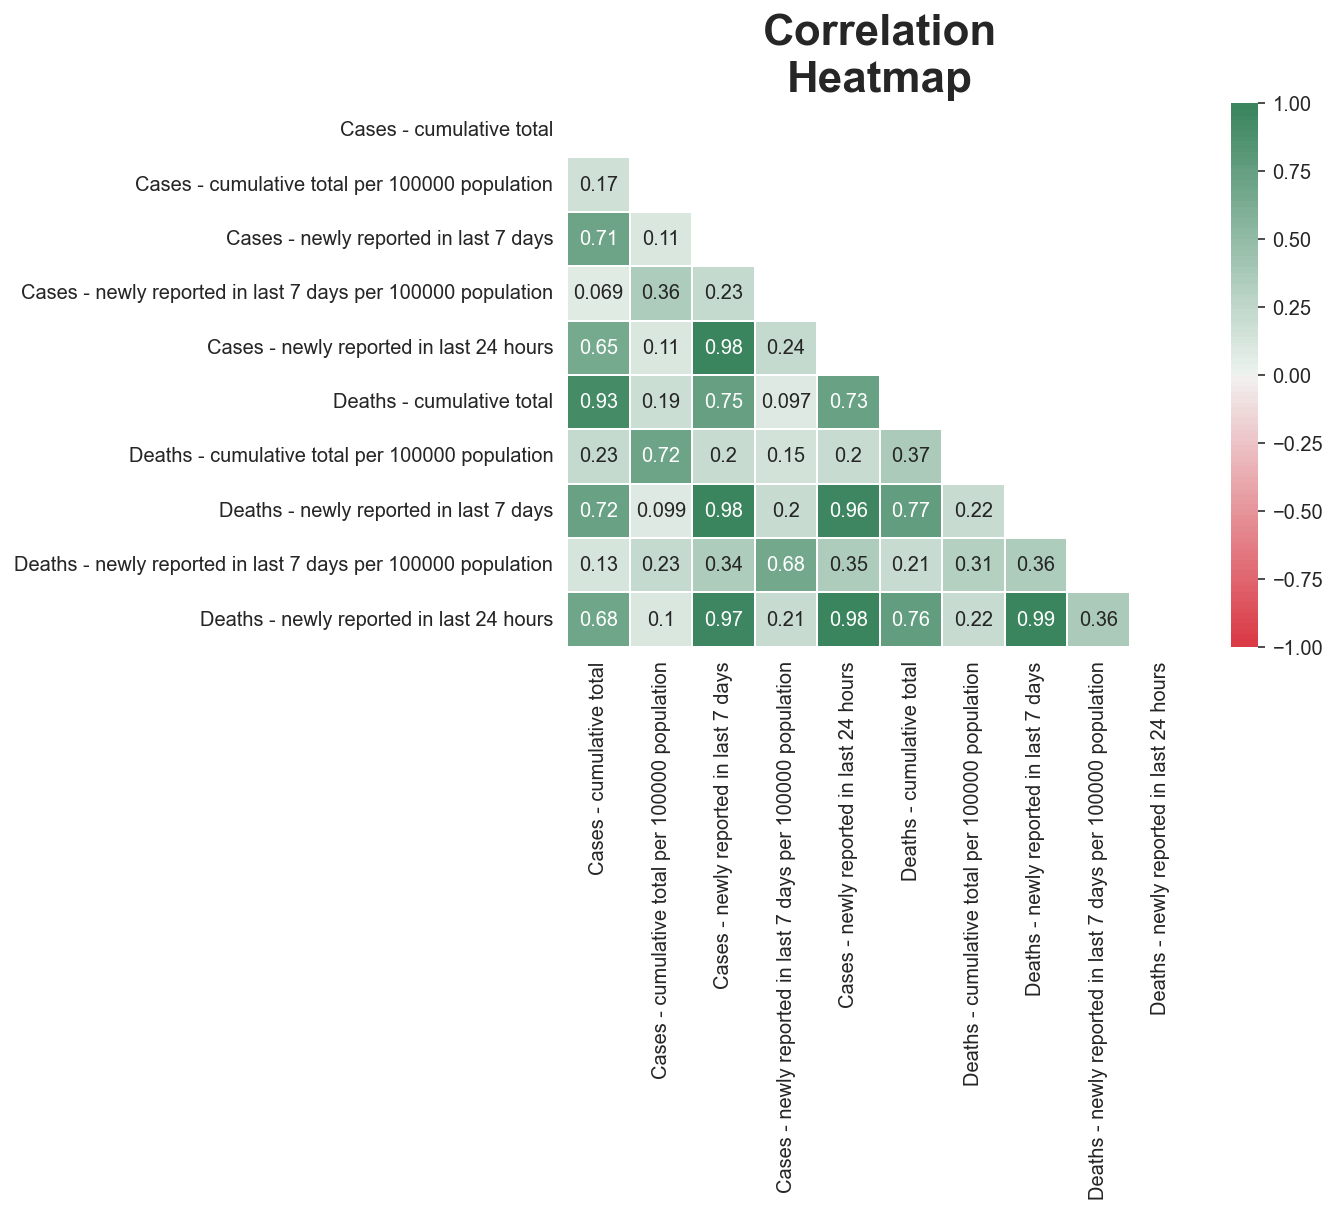

In [27]:
dcorr=df[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax).set_title("Correlation\nHeatmap", fontsize=22,fontweight="bold");

## 2. ตั้งประเด็นคำถามที่น่าสนใจพร้อมสร้างและวิเคราะห์ข้อมูลด้วย machine learning model


### ประเด็นคำถามที่น่าสนใจคือ ในเมื่อประเทศเหล่านี้มีผู้ติดเชื้อเหมือนกันแต่ แต่ละประเทศนั้นต่างกันอย่างไร? จัดอยู่ในลักษณะแบบไหนกันแน่? 
- โดยวิธีที่เราจะเลือกใช้คือทำ Clustering ด้วย KMeans Clustering ในการแบ่งประเภท
- Columns ที่เลือกใช้มีเพียงแค่ Cases - cumulative total per 100000 population กับ Deaths - cumulative total per 100000 population

เนื่องจาก 2 คอลัมน์นี้เป็นคอลัมน์ที่มีสัดส่วนที่ชัดเจน คือยอดสะสมต่อจำนวนประชากร 1 แสนคน ซึ่งเป็นข้อมูลที่ค่อนข้างแฟร์ในแบบที่เทียบกับประเทศอื่นได้ในรูปแบบของอัตราส่วนเดียวกัน เราจึงเลือกใช้ 2 คอลัมน์นี้

In [28]:
cols2=['Cases - cumulative total per 100000 population',
       'Deaths - cumulative total per 100000 population']

In [29]:
df[cols2].head()

Cases - cumulative total per 100000 population  \
1                                        10047.58   
2                                         2183.65   
3                                         8548.14   
4                                         8695.31   
5                                         3706.52   

   Deaths - cumulative total per 100000 population  
1                                           180.58  
2                                            28.50  
3                                           238.57  
4                                           169.13  
5                                            90.50

In [30]:
X=df[cols2]

### ค้นหา Optimal number of clusters ด้วยกราฟ silhouette_score เพราะค่อนข้างบอกได้แม่นยำและดูง่าย โดยจะดูกราฟและสกอร์ตั้งแต่คลัสเตอร์จำนวน 2 คลัสเตอร์ ไปจนถึง 6 คลัสเตอร์เพื่อเปรียบเทียบและวิเคราะห์ในการเลือกจำนวนที่น่าจะโอเคที่สุด

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [32]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
    return sils

In [33]:
ss=sil_score(X, 2, 6)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.7158, 2], [0.7083, 3], [0.6778, 4], [0.6644, 5], [0.6579, 6]]
optimal number of clusters = 2


In [34]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

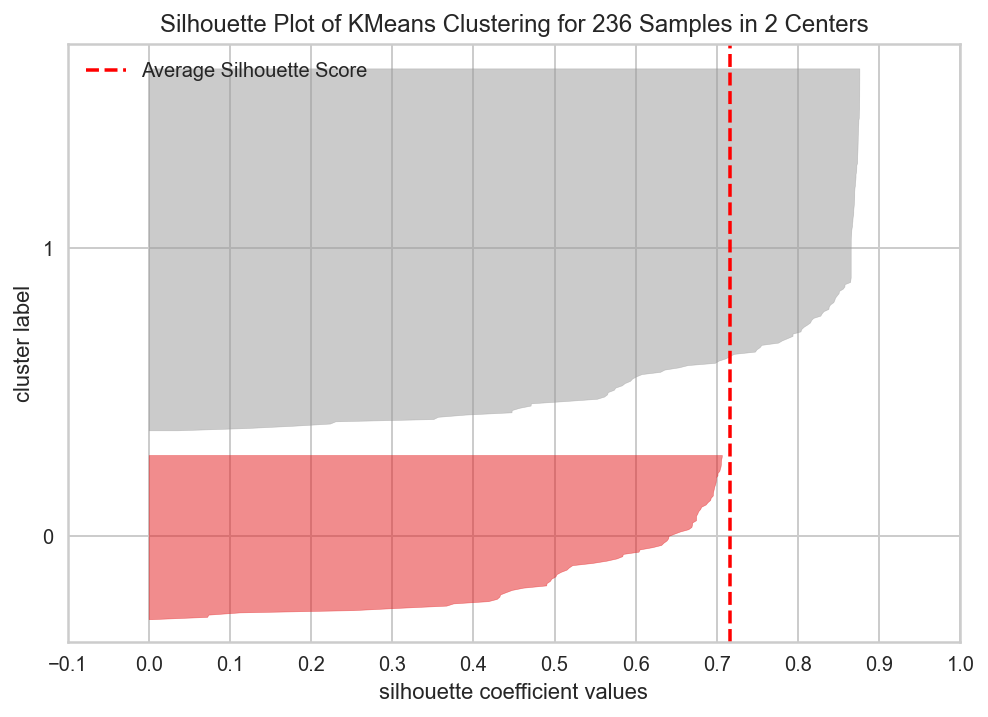

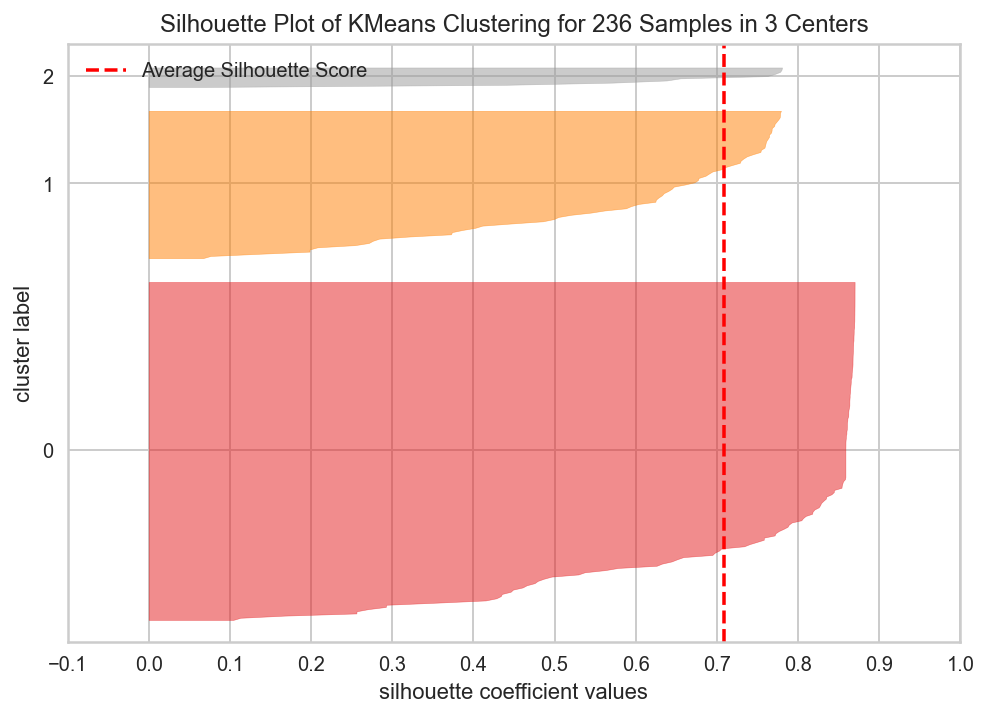

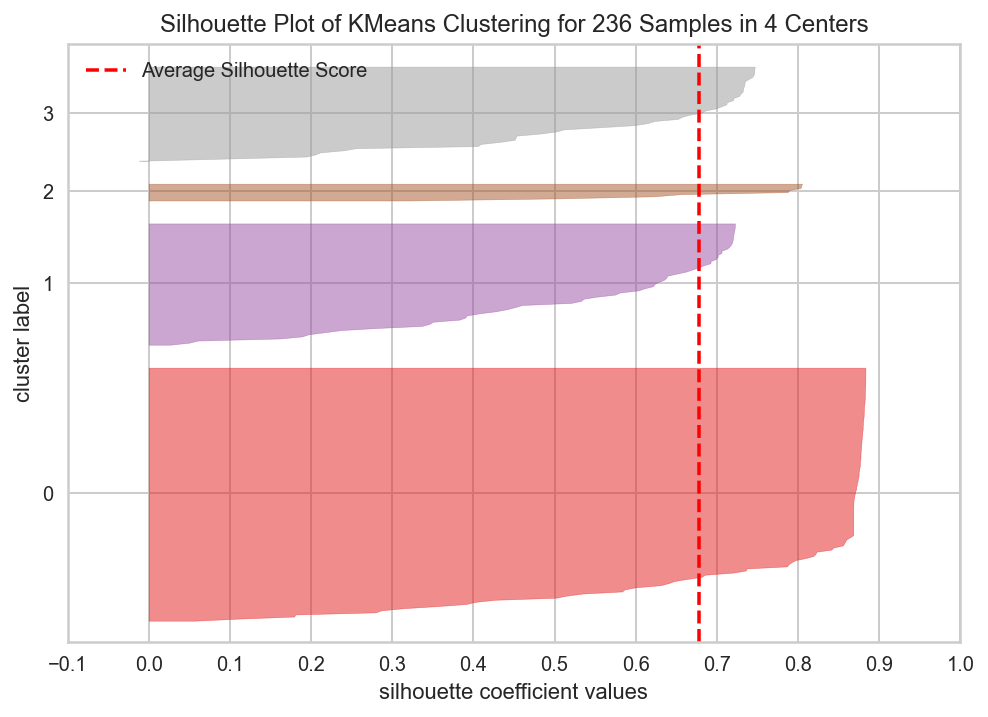

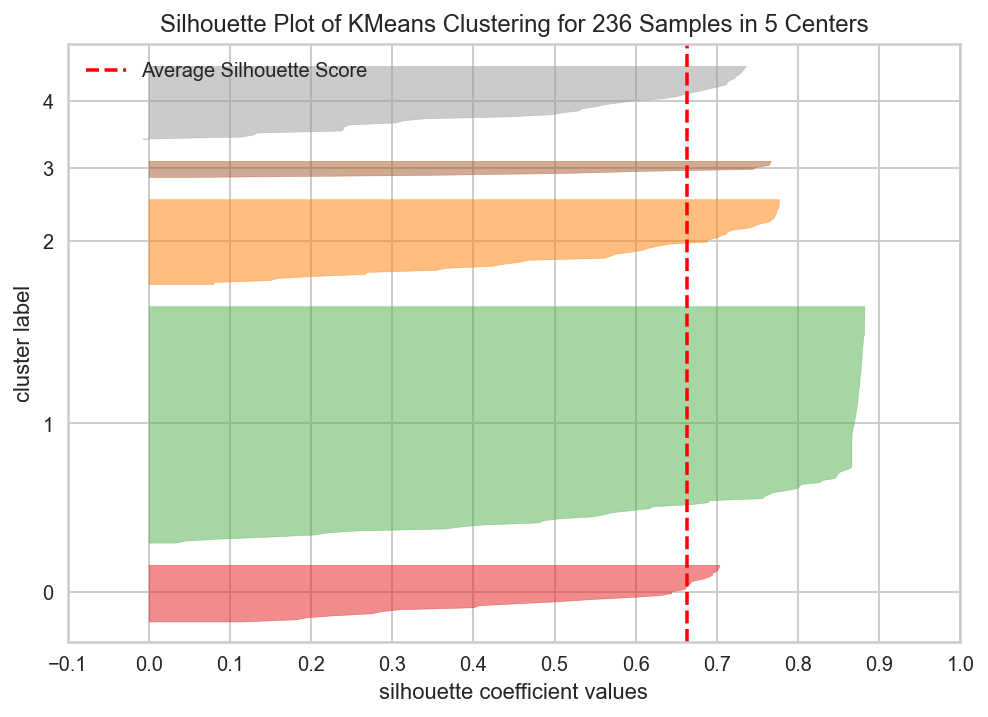

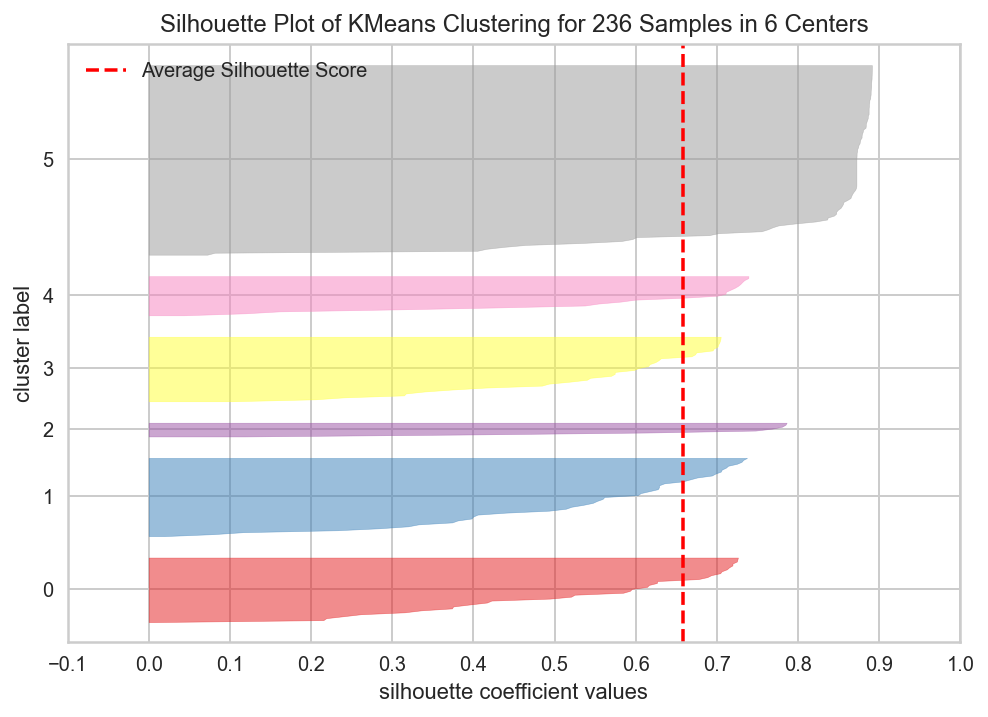

In [35]:
scores=silhouette_plot(X, 2, 6)

### หลังจากดู Silhouette plot แล้ววิเคราะห์ได้ว่า
- 2 และ 3 คลัสเตอร์ กำลังดีและน่าสนใจ
- ถ้าเป็น 4 5 6 นั้นอาจจะยากไปสำหรับการตีความคลัสเตอร์นั้นๆเพราะบางอันมีเส้นค่าเฉลี่ยหรือเส้นประสีแดงที่ให้ค่า silhouette coef ที่น้อย
- ซึ่งเราจะใช้ 3 คลัสเตอร์เพราะว่า ทุกคลัสเตอร์มีสกอร์เลยเส้นประค่าเฉลี่ย และมีค่า silhouette coef อยู่ในระดับที่ค่อนข้างโอเค
- แต่ละคลัสเตอร์ดูแบ่งกันได้ชัดเจน และดูเกาะกลุ่มกันพอรับได้ ถึงแม้ cluster lebel ที่ 2 จะมีน้อย แต่ค่อนข้างแบกแยกออกมาได้ชัดเจนอยู่

In [36]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [37]:
model.cluster_centers_.round(3)

array([[ 1041.412,    19.209],
       [ 7400.179,   130.631],
       [14523.879,   177.761]])

In [38]:
model.transform(X) # the distance between each point and centroid

array([[ 9007.61330627,  2647.8724551 ,  4476.29988765],
       [ 1142.27549578,  5217.52838381, 12341.13165875],
       [ 7509.93210779,  1153.02468243,  5976.04838757],
       [ 7655.36586433,  1295.7033785 ,  5828.57539043],
       [ 2666.06105421,  3693.87670091, 10817.71095089],
       [ 5353.45255846,  1008.03627821,  8130.03245839],
       [ 5861.68633658,   502.88329322,  7623.23673411],
       [ 8532.44136625,  2172.88143947,  4952.02504067],
       [ 6097.15572147,   277.39178727,  7388.49567935],
       [ 6875.25463711,   518.80848309,  6609.63763421],
       [ 6941.0795502 ,   582.03732356,  6543.0428859 ],
       [ 3439.41076386,  2920.60858016, 10044.46415469],
       [ 2698.33896996,  3661.75205556, 10785.60380845],
       [ 6546.92475719,   197.38842919,  6937.99696566],
       [  902.48435745,  5470.90982676, 12594.38916831],
       [ 4065.24353067,  2294.78598492,  9418.63956597],
       [  283.57575549,  6643.24980978, 13766.93597669],
       [ 5165.39507111,  1303.5

In [39]:
X['cluster'] = model.labels_
X

Cases - cumulative total per 100000 population  \
1                                          10047.58   
2                                           2183.65   
3                                           8548.14   
4                                           8695.31   
5                                           3706.52   
..                                              ...   
233                                            0.00   
234                                            0.00   
235                                            0.00   
236                                            0.00   
237                                            0.00   

     Deaths - cumulative total per 100000 population  cluster  
1                                             180.58        1  
2                                              28.50        0  
3                                             238.57        1  
4                                             169.13        1  
5                                              90.50        0  
..                                               ...      ...  
233                                             0.00        0  
234                                             0.00        0  
235                                             0.00        0  
236                                             0.00        0  
237                                             0.00        0  

[236 rows x 3 columns]

### หลังจากได้ทำการ label cluster ต่างๆเรียบร้อยแล้วก็ทำการตรวจสอบเพิ่มเติมเพื่ออธิบายแต่ละ cluster ว่ามีความต่างกันอย่างไรด้วยวิธีต่างๆ

In [40]:
# ตารางค่าเชิงสถิติ
X.groupby('cluster').describe().T

cluster                                                          0  \
Cases - cumulative total per 100000 population  count   157.000000   
                                                mean   1041.412293   
                                                std    1222.321923   
                                                min       0.000000   
                                                25%      96.590000   
                                                50%     337.060000   
                                                75%    1722.650000   
                                                max    4036.990000   
Deaths - cumulative total per 100000 population count   157.000000   
                                                mean     19.208662   
                                                std      30.994143   
                                                min       0.000000   
                                                25%       0.860000   
                                                50%       4.880000   
                                                75%      25.100000   
                                                max     179.820000   

cluster                                                           1  \
Cases - cumulative total per 100000 population  count     69.000000   
                                                mean    7400.178696   
                                                std     1719.168250   
                                                min     4355.400000   
                                                25%     6062.030000   
                                                50%     7337.790000   
                                                75%     8548.140000   
                                                max    10543.560000   
Deaths - cumulative total per 100000 population count     69.000000   
                                                mean     130.631304   
                                                std       87.636549   
                                                min       10.120000   
                                                25%       74.620000   
                                                50%      114.790000   
                                                75%      169.130000   
                                                max      579.500000   

cluster                                                           2  
Cases - cumulative total per 100000 population  count     10.000000  
                                                mean   14523.879000  
                                                std     2013.582477  
                                                min    11273.770000  
                                                25%    13004.857500  
                                                50%    15182.930000  
                                                75%    15573.707500  
                                                max    17960.270000  
Deaths - cumulative total per 100000 population count     10.000000  
                                                mean     177.761000  
                                                std       96.663531  
                                                min       38.290000  
                                                25%       91.462500  
                                                50%      195.430000  
                                                75%      262.900000  
                                                max      283.260000

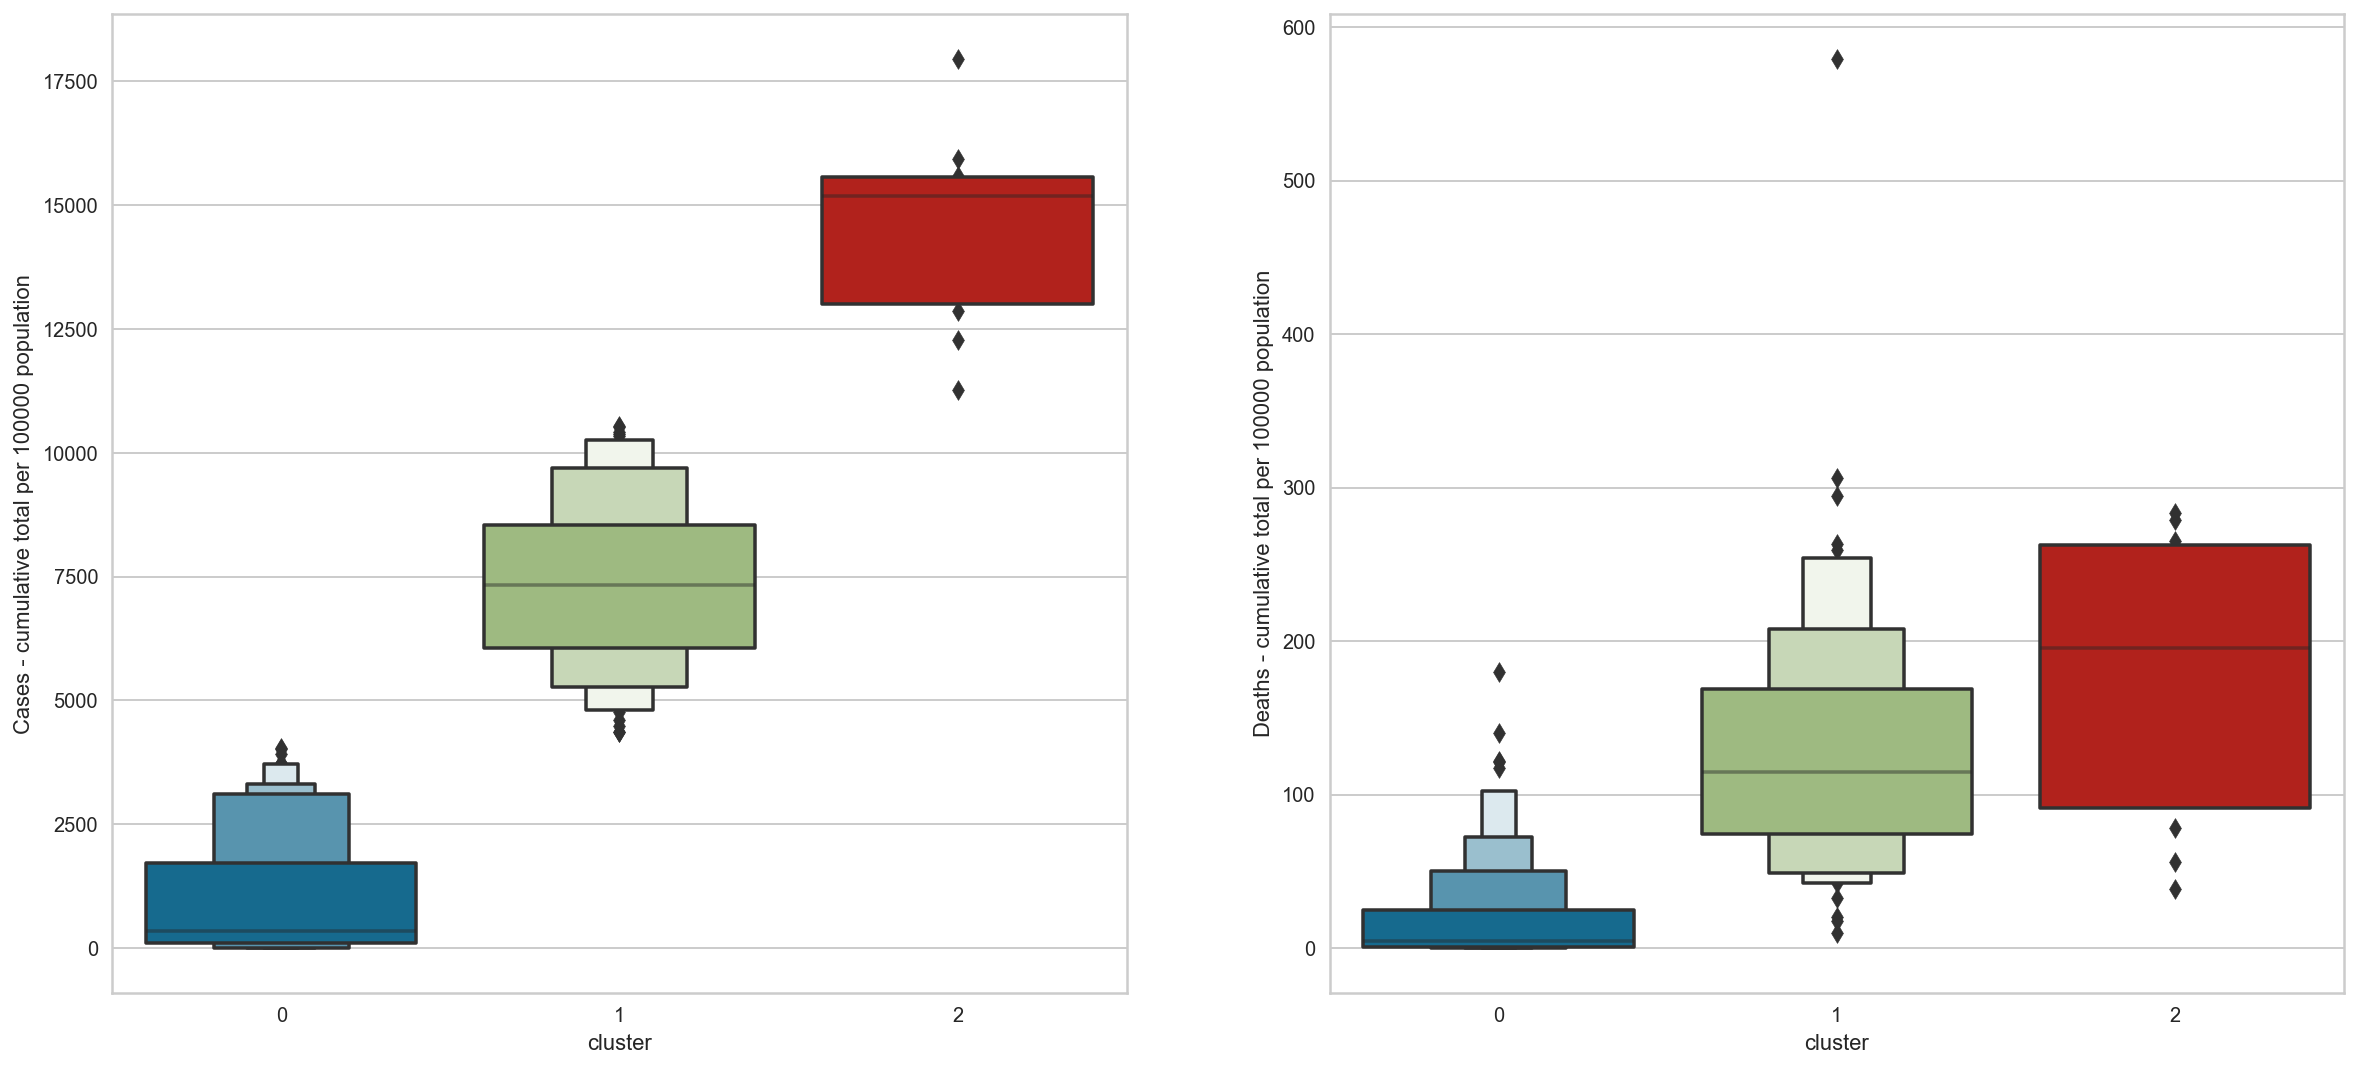

In [41]:
# boxen plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols2):
    sns.boxenplot(x='cluster', y=col, data=X, ax=ax[i])

หลังจากทำ boxen plot จะเห็นข้อมูลได้ดีและค่อนข้างชัดว่ามีความต่างกันยังไง ซึ่งฝั่งซ้ายที่เป็น case cumulative per 100000 population แบ่งเกาะกลุ่มกันได้ชัดดี ส่วน Deaths cumulative per 10000 population มีลักษณะค่อนข้างใกล้เคียงกันในแต่ละคลัสเตอร์แต่ยังพอเห็นความแตกต่างอยู่ ซึ่งมีรายละเอียดของค่าเฉลี่ยดังนี้

case cumulative per 100000 population
- Cluster 0 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 7400 ราย
- Cluster 1 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 1206 ราย 
- Cluster 2 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 14523 ราย	

deaths cumulative per 100000 population
- Cluster 0 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 130 ราย
- Cluster 1 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 22 ราย 
- Cluster 2 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 177 ราย	

เพื่อให้เห็นความแตกต่างและผลลัพธ์คือได้เห็นตัวเลขที่ค่อนข้างต่างกันพอสมควร

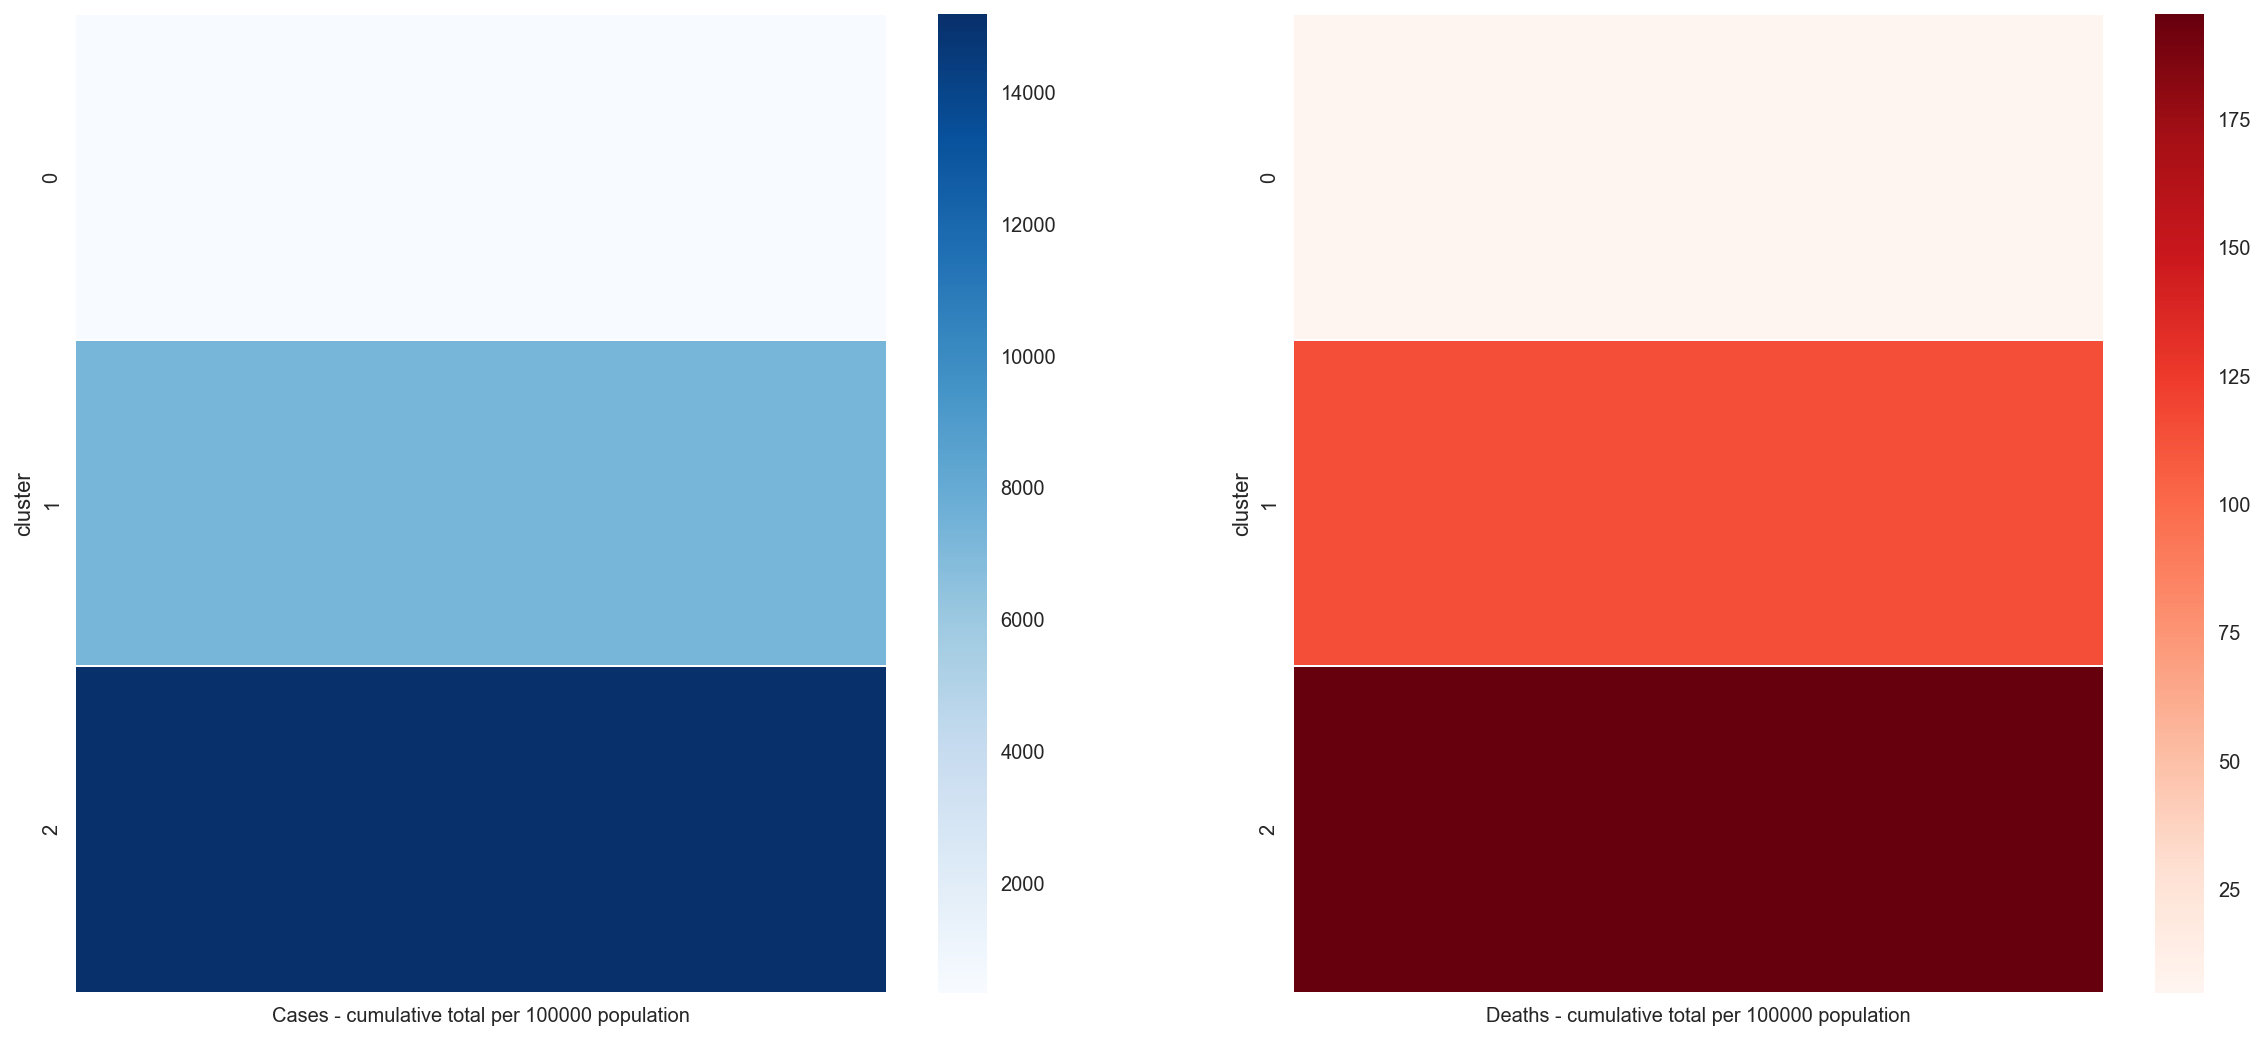

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
sns.heatmap(X.iloc[:,[0,2]].groupby('cluster').median().sort_values(by='cluster'), cmap="Blues", linewidths=1,ax=ax[0]) # Case cumulative per 100000 population Heatmap
sns.heatmap(X.iloc[:,[1,2]].groupby('cluster').median().sort_values(by='cluster'), cmap="Reds", linewidths=1,ax=ax[1]) # Death cumulative per 100000 population Heatmap
fig.show()

เนื่องจาก median สามารถเป็นตัวแทนของแต่ละ feature ได้ จึงนำมาทำ Heatmap เทียบกันให้เห็นความต่างของแต่ละ cluster ได้เลย 
- จาก Heatmap แสดงให้เห็นสีที่แบ่งกันได้ ซึ่งสีจะเข้มมากน้อยตามจำนวนของตัวเลขและทำให้เราได้เห็นถึงความต่างของทั้ง case cumulative per 100000 population และ death per 100000 population ได้ดี 

## สรุปได้ว่า
- แบ่งได้ 3 cluster จากคอลัมน์ case cumulative per 100000 population และ Death cumulative per 100000 population
- cluster 0 เป็นตัวแทนของประเทศที่เสี่ยงปานกลาง เพราะจำนวนผู้ติดเชื้อค่อนข้างมากแต่ยังอยู่ตรงกลางถ้าเทียบกับกลุ่มอื่นและมีจำนวนผู้เสียชีวิตดูกระจายตัวพอๆกับ cluster 2 ซึ่งขึ้นอยู่แต่ละประเทศจะรับมือได้ดีแค่ไหน
- cluster 1 เป็นตัวแทนของประเทศที่เสี่ยงน้อย เพราะจำนวนผู้ติดเชื้อน้อยซึ่งอาจทำให้เชื้อแพร่กระจายได้น้อยที่สุดและจำนวนผู้เสียชีวิตก็น้อยเมื่อเทียบกับกลุ่มอื่น
- cluster 2 เป็นตัวแทนของประเทศที่เสี่ยงมาก เพราะผู้ติดเชื้อมากที่สุดซึ่งการแพร่กระจายมีโอกาสมากและจำนวนผู้เสียชีวิตก็มากอีกด้วย

### หลังจากที่ทำการ Clustering และได้ข้อสรูปว่า lebel cluster ที่เป็น 0 1 2 เราได้ตีความได้สามกลุ่มได้แก่ เสี่ยงปานกลาง เสี่ยงน้อย และเสี่ยงมาก
- เราจึงจะทำ Classification โดยใช้ LightGBM Classifier โดยใช้ Target col เป็น cluster เพื่อทดสอบว่า จาก feature col ทั้งสอง Cases และ Death cumulative total per 100000 population 
- เพื่อทดสอบประสิทธิภาพจากการ Clustering ที่ทำ โดยดูจาก score ของข้อมูลทั้ง Train และ Test

In [44]:
df2=X
df2

Cases - cumulative total per 100000 population  \
1                                          10047.58   
2                                           2183.65   
3                                           8548.14   
4                                           8695.31   
5                                           3706.52   
..                                              ...   
233                                            0.00   
234                                            0.00   
235                                            0.00   
236                                            0.00   
237                                            0.00   

     Deaths - cumulative total per 100000 population  cluster  
1                                             180.58        1  
2                                              28.50        0  
3                                             238.57        1  
4                                             169.13        1  
5                                              90.50        0  
..                                               ...      ...  
233                                             0.00        0  
234                                             0.00        0  
235                                             0.00        0  
236                                             0.00        0  
237                                             0.00        0  

[236 rows x 3 columns]

In [45]:
import lightgbm as lgb
print(f'lightgbm version {lgb.__version__}')

lightgbm version 3.2.1


In [46]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [47]:
df2.columns

Index(['Cases - cumulative total per 100000 population',
       'Deaths - cumulative total per 100000 population', 'cluster'],
      dtype='object')

In [48]:
feature_cols=['Cases - cumulative total per 100000 population','Deaths - cumulative total per 100000 population']
target_col='cluster'

X=df2[feature_cols]
y=df2[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=1, 
                                                    stratify=y)

In [49]:
clf=lgb.LGBMClassifier()

In [50]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [51]:
# tuning parameters: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# https://sites.google.com/view/lauraepp/parameters
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

clf = lgb.LGBMClassifier(**params)

In [52]:
# eval_metric: https://lightgbm.readthedocs.io/en/latest/Parameters.html?highlight=metric#metric-parameters
fit_params={'early_stopping_rounds':20, 
            'eval_metric': 'binary_logloss', #['binary_logloss', 'auc']
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }

clf.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.163418
[20]	valid_0's multi_logloss: 0.0484727
[30]	valid_0's multi_logloss: 0.0166335
[40]	valid_0's multi_logloss: 0.00659274
[50]	valid_0's multi_logloss: 0.0026598
[60]	valid_0's multi_logloss: 0.0012113
[70]	valid_0's multi_logloss: 0.000567356
[80]	valid_0's multi_logloss: 0.000285768
[90]	valid_0's multi_logloss: 0.000139994
[100]	valid_0's multi_logloss: 7.14923e-05
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 7.14923e-05


LGBMClassifier()

In [53]:
clf.score(X_train, y_train) # classification accuracy score

1.0

In [54]:
clf.score(X_test, y_test) # classification accuracy score

1.0

#### หลังจากใช้ LightGBM classifier แล้วได้คะแนนอยู่ในระดับที่ดีเพราะจำนวนข้อมูลที่น้อยเกินไป แต่เราก็จะลองทดสอบดู Detail ของการทำนายอีกโดยการทำ Confusion Matrix

In [55]:
cm=confusion_matrix(y_test, clf.predict(X_test))
cm

array([[32,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  2]])

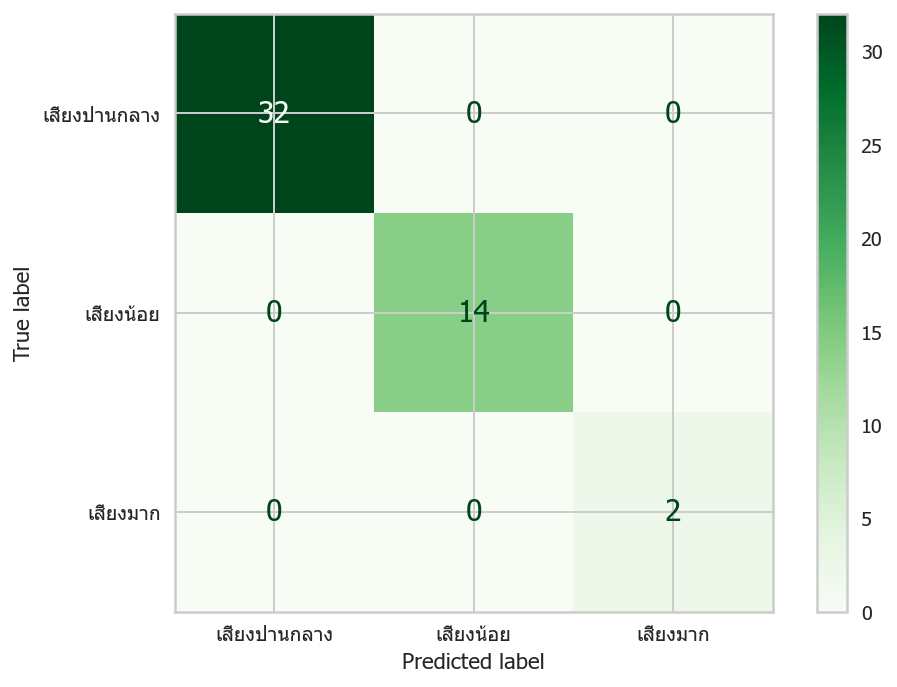

In [56]:
plt.rcParams['font.size']=15
plt.rcParams['font.family']='Tahoma'
plot_confusion_matrix(clf, X_test, y_test, cmap='Greens', display_labels=['เสี่ยงปานกลาง', 'เสี่ยงน้อย','เสี่ยงมาก']);

In [57]:
y_test.value_counts()

0    32
1    14
2     2
Name: cluster, dtype: int64

In [58]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00         8

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [59]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



----------------------------------------------------------------------------------------------------